Columns in dataset: ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


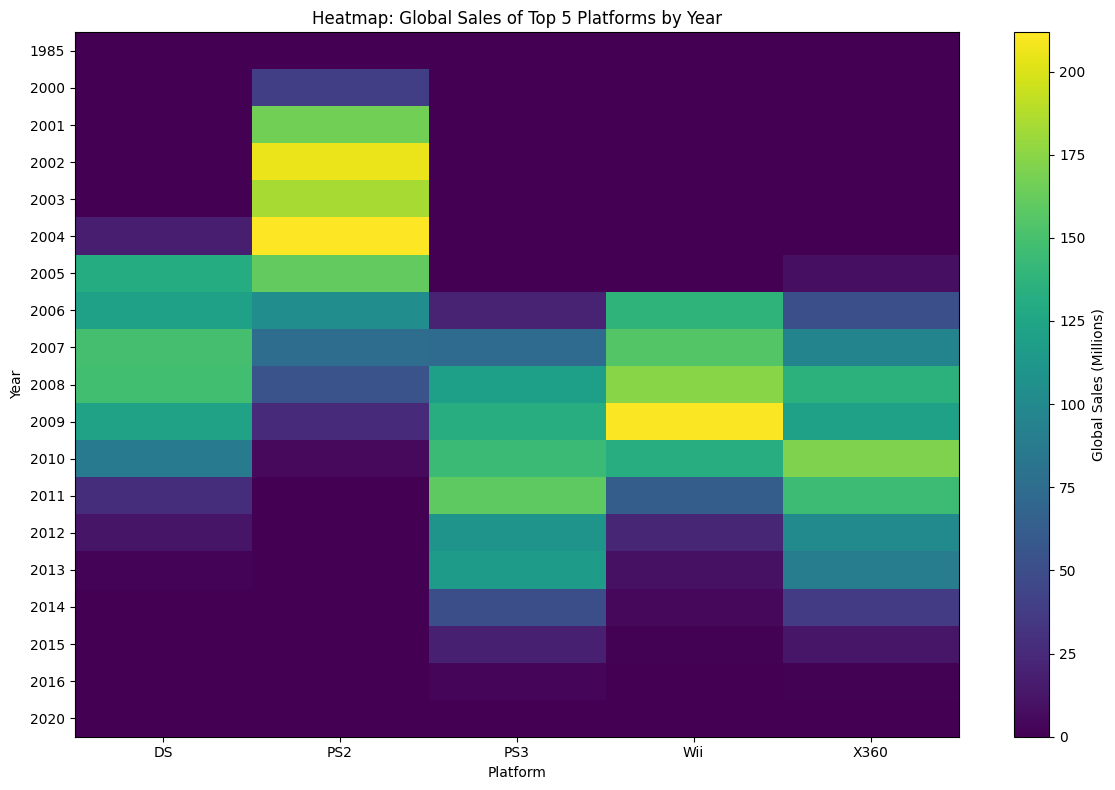

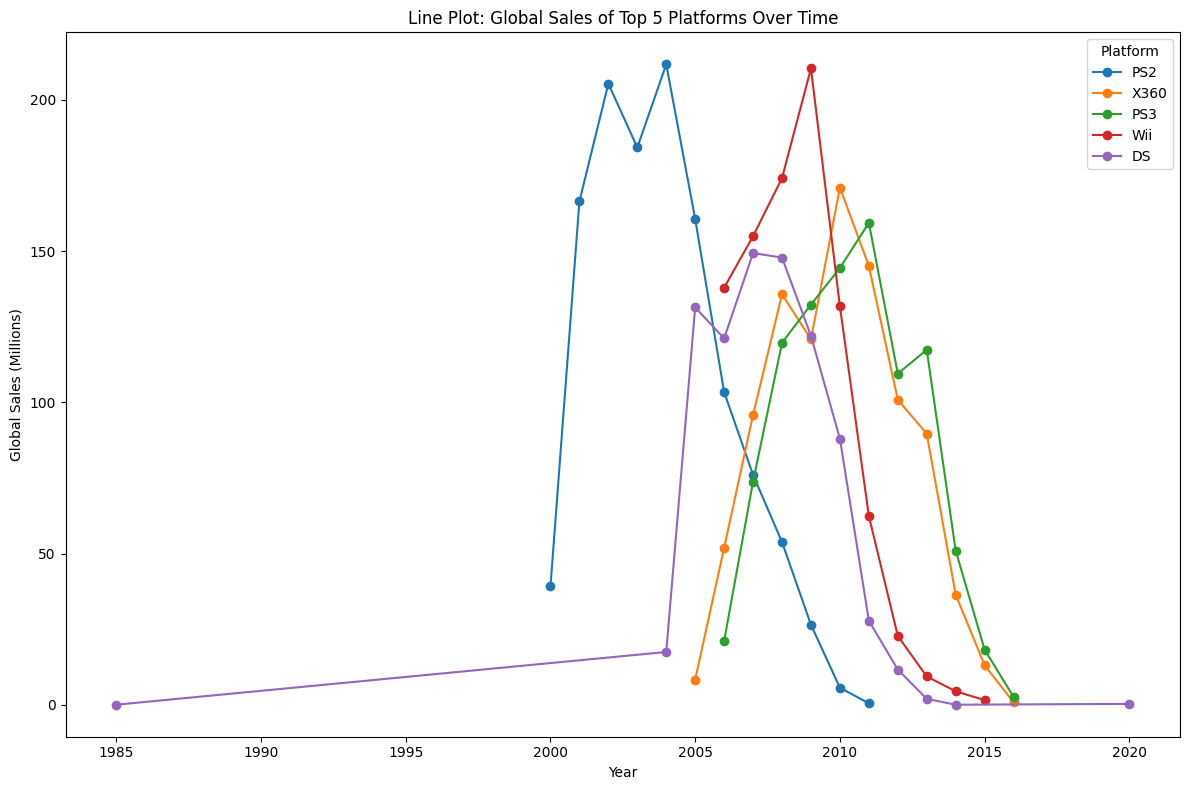

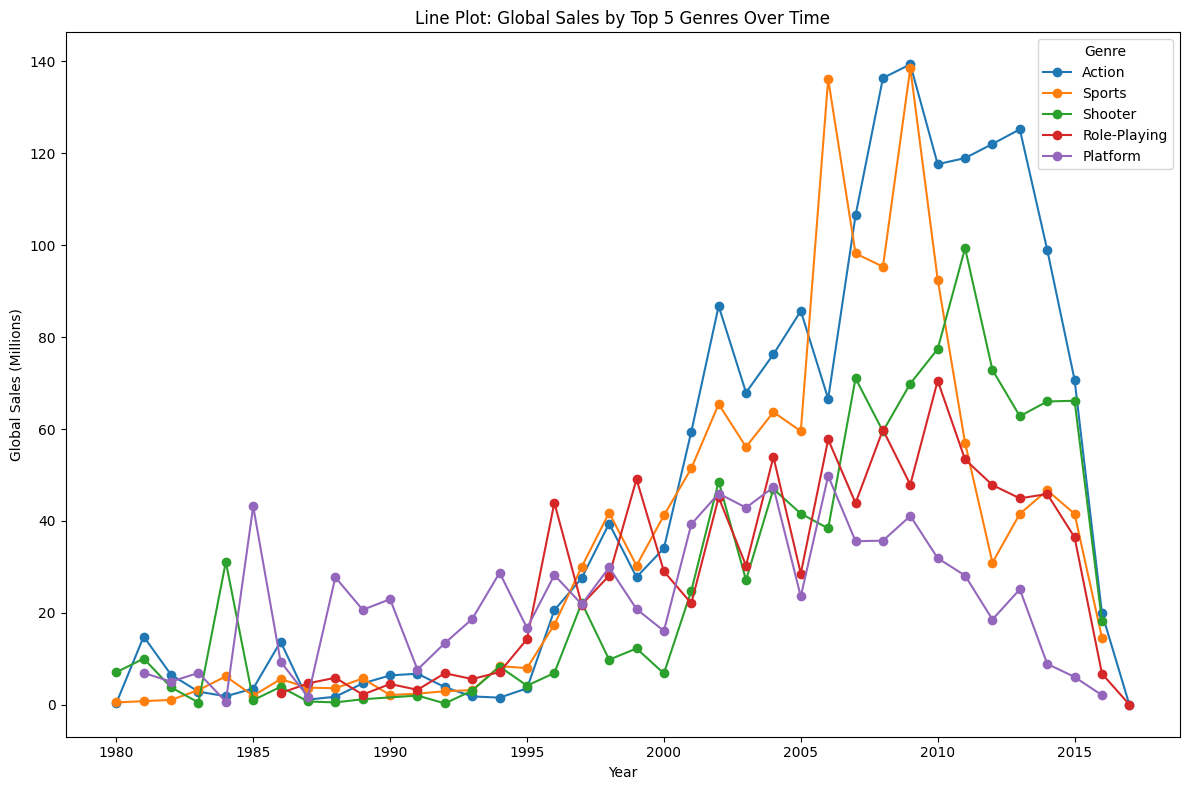

<Figure size 1200x800 with 0 Axes>

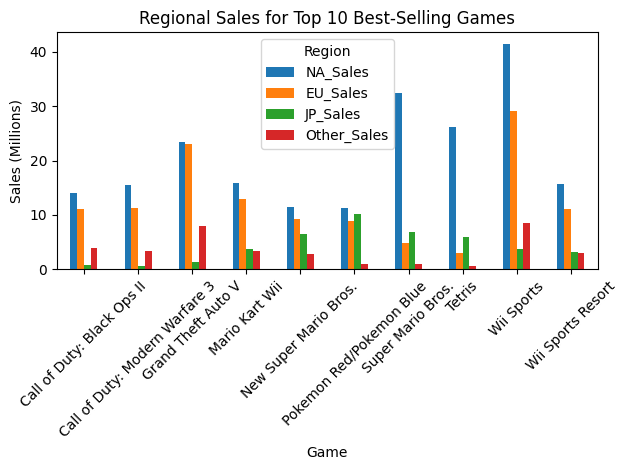

In [1]:
# %% [code]
# Imports
import pandas as pd
import matplotlib.pyplot as plt

# For Google Colab: if your file is not already in the Colab environment, you can upload it:
# from google.colab import files
# uploaded = files.upload()
# Then you can read the dataset with pd.read_csv('video games sales.csv')

# Load the dataset
# Update the file path if needed. In Colab, if you upload via the Files panel, just use the filename.
df = pd.read_csv('video games sales.csv')

# Print columns and first few rows for reference
print("Columns in dataset:", df.columns.tolist())
print(df.head())

# --- Basic Data Cleaning ---
# Convert the 'Year' column to numeric (in case there are non-numeric entries) and drop rows with missing years.
# (Adjust the column name if needed; some datasets may call it 'Year_of_Release'.)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)

# -------------------------------
# Visualization 1: Platform Popularity by Year
# -------------------------------
# We assume that "popularity" can be measured by total global sales.
# Group by Year and Platform to aggregate global sales.
platform_year_sales = df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

# Identify the top 5 platforms overall (by total global sales)
top_platforms = df.groupby('Platform')['Global_Sales'].sum().nlargest(5).index.tolist()
filtered_platform_data = platform_year_sales[platform_year_sales['Platform'].isin(top_platforms)]

# Create a pivot table (Years as rows, Platforms as columns) for a heatmap visualization.
pivot_platform = filtered_platform_data.pivot(index='Year', columns='Platform', values='Global_Sales')

# Plot a heatmap using imshow to visually compare global sales of top platforms per year.
plt.figure(figsize=(12, 8))
# Fill missing values with 0
plt.imshow(pivot_platform.fillna(0), aspect='auto', interpolation='nearest')
plt.colorbar(label='Global Sales (Millions)')
plt.title('Heatmap: Global Sales of Top 5 Platforms by Year')
plt.xlabel('Platform')
plt.ylabel('Year')
# Set x-ticks to platform names
plt.xticks(ticks=range(len(pivot_platform.columns)), labels=pivot_platform.columns)
# Set y-ticks to the years; sorting the index ensures years are in order.
years_sorted = sorted(pivot_platform.index.unique())
plt.yticks(ticks=range(len(years_sorted)), labels=years_sorted)
plt.tight_layout()
plt.show()

# Alternatively, plot a line chart for each top platform over time.
plt.figure(figsize=(12, 8))
for platform in top_platforms:
    platform_data = filtered_platform_data[filtered_platform_data['Platform'] == platform]
    plt.plot(platform_data['Year'], platform_data['Global_Sales'], marker='o', label=platform)
plt.title('Line Plot: Global Sales of Top 5 Platforms Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

# -------------------------------
# Visualization 2: Genre Popularity by Year
# -------------------------------
# Group data by Year and Genre for total global sales.
genre_year_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

# Identify the top 5 genres overall.
top_genres = df.groupby('Genre')['Global_Sales'].sum().nlargest(5).index.tolist()
filtered_genre_data = genre_year_sales[genre_year_sales['Genre'].isin(top_genres)]

plt.figure(figsize=(12, 8))
for genre in top_genres:
    genre_data = filtered_genre_data[filtered_genre_data['Genre'] == genre]
    plt.plot(genre_data['Year'], genre_data['Global_Sales'], marker='o', label=genre)
plt.title('Line Plot: Global Sales by Top 5 Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

# -------------------------------
# Visualization 3: Sales of Each Game in Different Regions
# -------------------------------
# Here we look at how top games perform in different regions.
# We first identify the top 10 best-selling games overall.
top_games = df.groupby('Name')['Global_Sales'].sum().nlargest(10).index.tolist()

# Filter data for these top games.
top_games_data = df[df['Name'].isin(top_games)]

# Aggregate regional sales by game.
# We assume the dataset has columns: NA_Sales, EU_Sales, JP_Sales, and Other_Sales.
sales_per_game = top_games_data.groupby('Name')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Plot a grouped bar chart for regional sales for each top game.
plt.figure(figsize=(12, 8))
sales_per_game.plot(kind='bar', rot=45)
plt.title('Regional Sales for Top 10 Best-Selling Games')
plt.xlabel('Game')
plt.ylabel('Sales (Millions)')
plt.legend(title='Region')
plt.tight_layout()
plt.show()


# **Interactive Version of the Graph**

In [2]:
# %% [code]
# Import necessary libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# If running in Colab, you can uncomment the following to upload your file:
# from google.colab import files
# uploaded = files.upload()

# Load the dataset
df = pd.read_csv('video games sales.csv')

# Display columns and first few rows for reference
print("Columns in dataset:", df.columns.tolist())
print(df.head())

# --- Data Cleaning ---
# Convert 'Year' to numeric, drop NaN values, and cast as integer.
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)

# ===============================
# Visualization 1: Interactive Platform Popularity by Year
# ===============================
# Aggregate global sales by Year and Platform.
platform_year_sales = df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

# Identify the top 5 platforms overall.
top_platforms = df.groupby('Platform')['Global_Sales'].sum().nlargest(5).index.tolist()
filtered_platform_data = platform_year_sales[platform_year_sales['Platform'].isin(top_platforms)]

# Create an interactive line chart for these platforms.
fig1 = px.line(filtered_platform_data, x='Year', y='Global_Sales', color='Platform',
               title='Interactive Global Sales of Top 5 Platforms Over Time',
               markers=True,
               hover_data={'Platform': True, 'Year': True, 'Global_Sales': ':.2f'})
fig1.show()

# ===============================
# Visualization 2: Interactive Genre Popularity by Year
# ===============================
# Aggregate global sales by Year and Genre.
genre_year_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

# Identify the top 5 genres overall.
top_genres = df.groupby('Genre')['Global_Sales'].sum().nlargest(5).index.tolist()
filtered_genre_data = genre_year_sales[genre_year_sales['Genre'].isin(top_genres)]

# Create an interactive line chart for these genres.
fig2 = px.line(filtered_genre_data, x='Year', y='Global_Sales', color='Genre',
               title='Interactive Global Sales of Top 5 Genres Over Time',
               markers=True,
               hover_data={'Genre': True, 'Year': True, 'Global_Sales': ':.2f'})
fig2.show()

# ===============================
# Visualization 3: Interactive Regional Sales for Top 10 Best-Selling Games
# ===============================
# Identify the top 10 best-selling games overall.
top_games = df.groupby('Name')['Global_Sales'].sum().nlargest(10).index.tolist()
top_games_data = df[df['Name'].isin(top_games)]

# Aggregate regional sales for these games.
# We assume the dataset has columns: NA_Sales, EU_Sales, JP_Sales, and Other_Sales.
sales_per_game = top_games_data.groupby('Name')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Create an interactive grouped bar chart.
fig3 = go.Figure()
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for region in regions:
    fig3.add_trace(go.Bar(
        x=sales_per_game['Name'],
        y=sales_per_game[region],
        name=region,
        hovertemplate='<b>%{x}</b><br>' + region + ': %{y:.2f}M<extra></extra>'
    ))

fig3.update_layout(
    title='Interactive Regional Sales for Top 10 Best-Selling Games',
    xaxis_title='Game',
    yaxis_title='Sales (Millions)',
    barmode='group'
)
fig3.show()


Columns in dataset: ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


<ipython-input-2-258357c5c2e6>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(int)
